#### Цифровая обработка данных.
#### Практика №4. Классификация сигналов. Дискретизация. Равномерное квантование.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
def select_plot(title, *args, **kwargs):
    """Вспомогательная функция для построения графика заданного сигнала
    (непрерывный, дискретный, квантованный).

    Args:
        title: (str) Тип сигнала ('continuous', 'discrete', 'quantized');
        args: Позиционные аргументы;
            Пример:
            t (np.ndarray): Дискретные отсчёты времени;
            signal (np.ndarray): Сигнал;
        kwargs: Именованные аргументы (ширина и тип линии, маркер и его размер и т.д.);
            Пример:
            linewidth=2

    Example:
    select_plot('continuous', t, signal, linewidth=2.0)
    """
    if title == 'continuous':
        plt.title('Непрерывный сигнал')
        plt.plot(*args, **kwargs)
    elif title == 'discrete':
        plt.title('Дискретный сигнал')
        plt.stem(*args, **kwargs)
    elif title == 'quantized':
        plt.title('Квантованный сигнал')
        plt.step(*args, **kwargs)
    else:
        print('Введите корректный тип сигнала')
    plt.xlim([0, 1])
    plt.xlabel('Время (сек.)')
    plt.ylabel('Амплитуда')
    plt.yticks(np.linspace(np.floor(np.min(signal)), np.ceil(np.max(signal)), 9))
    plt.grid(True)
    axes = plt.gca()
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.spines['bottom'].set_position(('data', 0))
    plt.show()

In [3]:
SAMPLES = 32  # количество отсчётов
t = np.linspace(0, 1, SAMPLES, endpoint=True)  # массив отсчётов времени в интервале [0, 1]
signal = np.sin(2 * np.pi * t)  # тестовый сигнал

# Аналоговый (непрерывный) сигнал

*Сигнал* можно определить как функцию, переносящей информацию о состоянии или поведении физической системы.
Сигналы представляются в виде функций одной или более независимых переменных.

*Аналоговый сигнал* $x(t)$ является непрерывной функцией времени, таким образом $x(t)$ однозначно определяется для всех $t$ (функция и её аргументы могут принимать любые значения в пределах некоторого интервала).

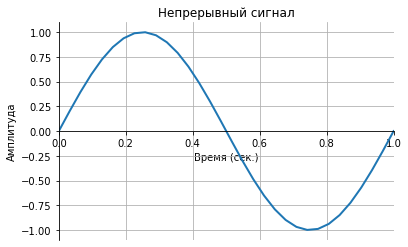

In [4]:
select_plot('continuous', t, signal, linewidth=2.0)

# Дискретный сигнал

*Дискретный сигнал* $x(kT)$ является сигналом, существующим только в дискретные промежутки времени. Дискретный сигнал характеризуется  последовательностью чисел, определенных для каждого момента времени $kT$ ($k$ - целое число, $T$ - промежуток времени). Такие числа являются значениями сигнала в дискретные т.е. отдельные моменты времени и называются отсчётами сигнала. Зачастую отсчёты берутся через равные промежутки времени $T$, называемые *периодом дискретизации* или *шагом дискретизации*. Величина, обратная периоду дискретизации, называется *частотой дискретизации*:
$$f_Д = 1/T$$
Круговая частота определяется следующим образом:
$$\omega_Д = 2\pi/T$$


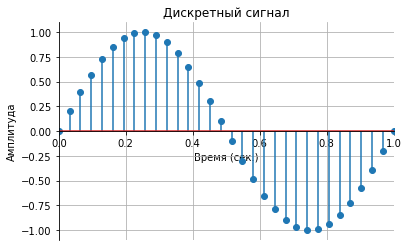

In [5]:
select_plot('discrete', t, signal)

# Квантованный сигнал

*Квантованный сигнал* описывается ступенчатой функцией, которая принимает лишь ряд дискретных уровней - уровней
квантования $mq$, $q$ - шаг квантования, $m$ - номер интервала квантования, $m = 0,1,..., M-1$, $M = 2^n$
($n$ - целое число).

*Цифровыми сигналами* являются те, у которых дискретны как время (или иная переменная), так и уровень (величина) сигнала. Сигнал, дискретный во времени, но не квантованный по уровню, называется *дискретным*.

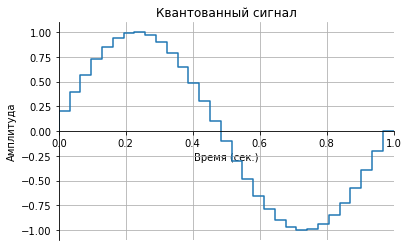

In [6]:
select_plot('quantized', t, signal)

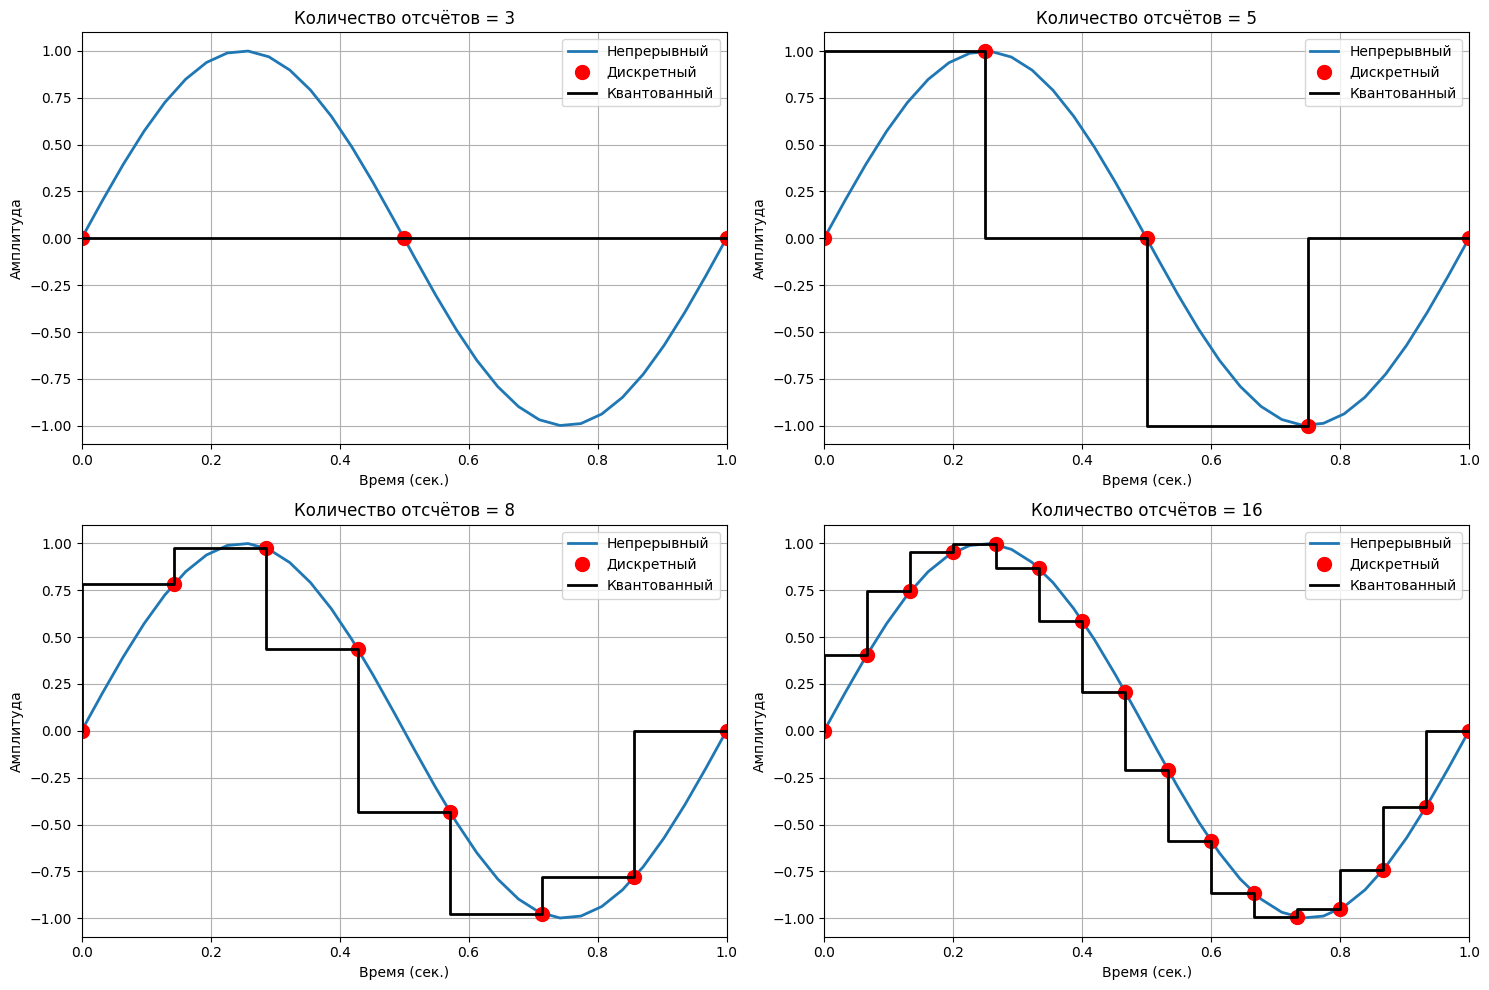

In [7]:
# Пример гармонического сигнала с различным количеством отсчётов

samples_list = [3, 5, 8, 16]

fig = plt.figure(figsize=(15, 10), dpi=100)
for i, number in enumerate(samples_list, 1):
    t_samples = np.linspace(0, 1, number, endpoint=True)

    plt.subplot(2, 2, i)
    plt.title(f'Количество отсчётов = {number}')
    plt.plot(t, signal, '-', linewidth=2.0, label='Непрерывный')
    plt.plot(t_samples, np.sin(2 * np.pi * t_samples), 'or',
             linewidth=2.0, markersize=10, label='Дискретный')
    plt.step(t_samples, np.sin(2 * np.pi * t_samples), 'k',
             linewidth=2.0, label='Квантованный')
    plt.grid()
    plt.xlim([0, 1])
    plt.xlabel('Время (сек.)')
    plt.ylabel('Амплитуда')
    plt.legend()
plt.tight_layout()
plt.show()

# Дискретизация

*Дискретизацией* называется процесс преобразования аналогового сигнала в последовательность отсчётов. Отсчёты могут принимать лишь конечное множество значений, следовательно при представлении  сигнала неизбежно происходит его округление. Очевидно, что для более точного описания аналогового сигнала требуется меньший период дискретизации.

Дискретные сигналы $x(kT)$ образуются путём умножения аналогового сигнала $x(t)$ на так называемую *функцию дискретизации*, которая представляет собой периодическую последовательность коротких импульсов, следующих с заданным шагом (интервалом) дискретизации. В качестве функции дискретизации часто используется периодическая последовательность **дельта-функций**.

## Дельта-функция Дирака

*Дельта-функция Дирака* $\delta(t)$ (также называется импульсной функцией) является такой функцией, которая равна бесконечности, когда её аргумент равен нулю, и равна нулю при остальных значениях аргумента:
$$ \large
\[ \delta(t) =
  \begin{cases}
    +\infty,       & \quad \text{если } t = 0, \\
    0,  & \quad \text{если } t \neq 0;
  \end{cases}
\]
$$

По сути, эта функция является абстракцией импульса с бесконечно большой амплитудой, нулевой шириной и единичным весом (т.е. площадью под импульсом) в точке, где значения его аргумента равно нулю. При выполнении дискретизации дельта-функцию $\delta(t)$ рассматривают как импульс конечной амплитуды, единичной площади и ненулевой длительности (в идеальном случае нулевой).

Например, дельта-функция $\delta(t - t_0)$ будет представлять из себя пик, расположенный в точке $t = t_0$, высота которого равна интегралу от него (т.е. его площади); $A\delta(t - t_0)$ ($A$ - постоянная) представляет импульсную функцию с площадью равной $A$ и нулевыми значениями везде, за исключением точки $t = t_0$.

Важное свойство дельта-функции (свойство единичной площади) заключается в том, что интеграл от неё равен единице:
$$\large \[ \int_{-\infty}^{+\infty} \delta(t) \,dt \] = 1,$$
в случае импульса ненулевой длительности, расположенного в точке $t_0$ можно записать таким образом:
$$ \large \[ \int_{t_0 - \varepsilon}^{t_0 + \varepsilon} \delta(t - t_0) \,dt \] = 1,$$ при любом $\varepsilon > 0$.

Дельта-функция Дирака также является чётной, т.е. $\delta(-t) = \delta(t)$.

И наконец, интеграл от произведения единичного импульса и произвольной функции дает выборку функции $x(t)$ в точке $t = t_0$ (данное свойство называется **фильтрующим свойством** дельта-функции):
$$ \large \[ \int_{-\infty}^{+\infty} x(t)\delta(t-t_0) \,dt = x(t_0)\].$$

Итак, **фильтрующее свойство** дельта-функции состоит в том, что если непрерывную функцию умножить на дельта-функцию и произведение проинтегрировать по времени, то результат будет равен значению непрерывной функции в той точке, где сосредоточен дельта-импульс.

## Гребень Дирака (последовательность дельта-функций)

Периодическая последовательность дельта-функций, следующих с периодом $T$ определяется следующим образом:
$$ \large
\Delta _{T}(t) = \sum_{k=0}^\infty \delta(t-kT).$$

(*нижний предел суммы обобщённо можно записать как $k = - \infty$*)

Эту функцию можно назвать *функцией идеальной дискретизации*.
Функция $\Delta _{T}(t)$ является периодической, т.е. $\Delta _{T}(t + T) = \Delta _{T}(t)$.
Описанную выше периодическую последовательность дельта-функций, следующих с периодом $T$, называют ещё **гребнем Дирака**.

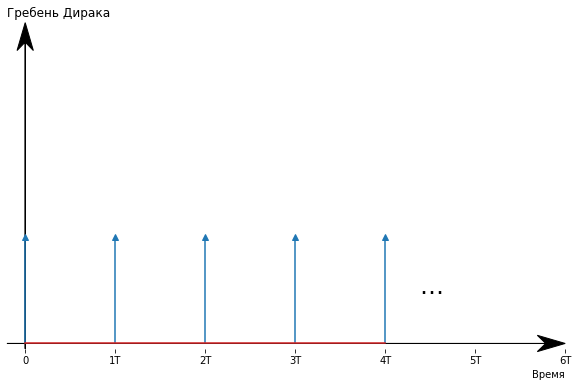

In [8]:
# Последовательность дельта-функций
dirac_sequence = np.ones(5)

# График последовательности
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.stem(dirac_sequence, use_line_collection=True,  markerfmt='^')
plt.xlim(right=6)
plt.ylim(top=3)
plt.yticks([])
plt.title('Гребень Дирака', loc='left')
plt.xlabel('Время', horizontalalignment='right', x=1.0)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val, pos: f'{val:.0g}T' if val != 0 else '0'
))

# Ось со стрелками

for side in ['bottom', 'right', 'top', 'left']:
    ax.spines[side].set_visible(False)

dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

hw = 1. / 20. * (ymax - ymin)
hl = 1. / 20. * (xmax - xmin)
LW = 1.
OHG = 0.3

yhw = hw / (ymax - ymin) * (xmax - xmin) * height / width
yhl = hl / (xmax - xmin) * (ymax - ymin) * width / height

ax.arrow(xmin, 0, xmax - xmin, 0., fc='k', ec='k', lw=LW,
         head_width=hw, head_length=hl, overhang=OHG,
         length_includes_head=True, clip_on=False)

ax.arrow(0, ymin, 0., ymax - ymin, fc='k', ec='k', lw=LW,
         head_width=yhw, head_length=yhl, overhang=OHG,
         length_includes_head=True, clip_on=False)

# Добавление троеточия
plt.text(4.5, 0.5, r'$\cdots$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center'})
plt.show()

## Процесс дискретизации

Операция дискретизации, т.е. переход от аналогового сигнала $x(t)$ к дискретному $x_Д(t)$ (или $x(kT)$) осуществляется умножением $x(t)$ на функцию дискретизации $\Delta _{T}(t)$:
$$ \large x_Д(t) = x(t) \cdot \Delta _{T}(t).$$


Таким образом, дискретизированный сигнал представляется бесконечно узкими импульсами (в идеальном случае ширина импульса равна 0), площадь которых равна $T\cdot x(kT)$. Такие импульсы располагаются в равноотстоящих (эквидистантных) точках $kT$, $k = 0, \pm 1, \pm 2, \pm 3, ...$.

# Задание

1. Задать гармонический сигнал $cos(2\pi t)$, количество отсчётов 3200, интервал $[0, 5]$.
2. Сгенерировать последовательность дельта-функций. Период последовательности $n = 40, 50, 100$, т.е. каждый $n-й$ отсчёт должен быть единичным импульсом.
3. Выполнить дискретизацию гармонического сигнала путем умножения его на функцию дискретизации.
4. Вывести сигнал после дискретизации.





[1.         0.99995178 0.99980712 ... 0.99980712 0.99995178 1.        ]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
0.024701407017078014
0.01962032511973963
0.00920704787711829


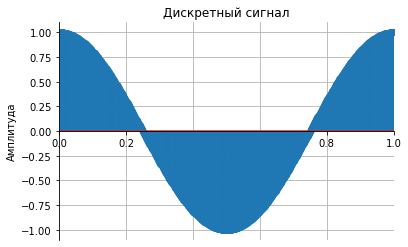

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis 
from scipy.stats import skew 
%matplotlib  inline  



SAMPLES = 3200  # количество отсчётов
t = np.linspace(0, 5, SAMPLES, endpoint=True)  # массив отсчётов времени в интервале [0, 1]
signal = np.cos(2 * np.pi * t)  # тестовый сигнал
print(signal)
a = np.zeros(3200)
a = np.array(a)
a[::40] = 1
print(a)

b = np.zeros(3200)
b = np.array(b)
b[::50] = 1
print(b)

c = np.zeros(3200)
c = np.array(c)
c[::100] = 1
print(c)


ds1 = signal.dot(a)
print(ds1)
ds2 = signal.dot(b)
print(ds2)
ds3 = signal.dot(c)
print(ds3)

def select_plot(title, *args, **kwargs):
    if title == 'continuous':
        plt.title('Непрерывный сигнал')
        plt.plot(*args, **kwargs)
    elif title == 'discrete':
        plt.title('Дискретный сигнал')
        plt.stem(*args, **kwargs)
    elif title == 'quantized':
        plt.title('Квантованный сигнал')
        plt.step(*args, **kwargs)
    else:
        print('Введите корректный тип сигнала')
    plt.xlim([0, 1])
    plt.xlabel('Время (сек.)')
    plt.ylabel('Амплитуда')
    plt.yticks(np.linspace(np.floor(np.min(signal)), np.ceil(np.max(signal)), 9))
    plt.grid(True)
    axes = plt.gca()
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.spines['bottom'].set_position(('data', 0))
    plt.show()
    
    
select_plot('discrete', t, signal)   

# Квантование

*Квантованием* является замена непрерывной шкалы уровней сигнала дискретной. Ошибки округления (отбрасывание некоторой исходной аналоговой информации), возникающие при квантовании, называются **ошибками (шумами) квантования**. Величина этого шума обратно пропорциональна числу уровней квантования. Для аппроксимации значений из непрерывного диапазона на входе используются значения из конечного множества, состоящего из $L$ уровней ($L$ - число уровней квантования).

Процесс квантования сводится к тому, что вместо мгновенного значения сигнала передаётся ближайшее значение по установленной шкале уровней квантования. Вся шкала допустимых значений сигнала разбивается на ряд уровней с шагом квантования $\Delta$. Значение функции (сигнала) $x(t)$ в некоторый момент времени $t = kT$ заменяется величиной ближайшего уровня $n\Delta$ так, чтобы ошибка была всегда меньше половины шага квантования.

Если уровни квантования равномерно распределены  по всему диапазону (*шаг квантования остаётся постоянным в допустимых пределах возможных значений*, т.е. $\Delta = const$), то такое квантование называется **равномерным** или **линейным**.

Каждое значения аналогового сигнала аппроксимируется квантованным: аппроксимация даёт ошибку, не превышающую $\pm \Delta/2$. Таким образом, ухудшение сигнала вследствие квантования ограничено половиной квантового  интервала.

В качестве критерия качества *равномерного квантования* выступает дисперсия (при подразумеваемом нулевом среднем), которая соответствует *средней мощности шума квантования*. Обозначим через $e$ ошибку квантования. Тогда *мощность ошибки квантования* представляет собой математическое ожидание квадрата ошибки квантования $e$:

$$ \large
E(e^2)=\int_{-\Delta /2}^{\Delta /2}e^2 \cdot p(e)de ,$$

где **$p(e)$** - (равномерно распределённая) плотность вероятности возникновения ошибки квантования. Т.е. тут вычисляется мощность (дисперсия) каждого возможного значения ошибки $e$, возведя её в квадрат и умножая на её вероятность, для получения *средней мощности ошибки квантования*.

Если полагать, что ошибка квантования, $e$, равномерно распределена в пределах интервала квантования шириной $\Delta$ (т.е. аналоговый сигнал принимает все возможные значения с равной вероятностью) и поскольку интеграл по вероятностям всех возможных значений $e$ должен быть равен 1, а возможные значения $e$ находятся между $-\Delta /2$ и $\Delta /2$, то получаем:

$$ \large
1=\int_{-\Delta /2}^{\Delta /2}p(e)de=p(e) \cdot \int_{-\Delta /2}^{\Delta /2}de=p(e) \cdot \Delta,$$

тогда

$$ \large p(e)=1/\Delta$$

и соответственно

$$ \large E(e^2)=\frac{1} {\Delta} \cdot \int_ {-\Delta/2}^{\Delta/2} e^2 de
= \frac{1} {\Delta} \left(\frac{(\Delta/2)^3} {3} - \frac{(-\Delta/2)^3} {3} \right) = \frac{\Delta^2}{12}$$

Следовательно, **мощность ошибки квантования при равномерном квантовании** с размером шага $\Delta$ составляет:

$$ \large E(e^2)=\frac{\Delta^2}{12} $$



## Равномерное квантование

Рассмотрим следующий пример.
Предположим, что имеется сигнал с диапазоном значений от -1В до 1В, разрядность квантования составляет  4 бита (т.е. всего $2^4$ уровней квантования). На вход поступает значение 0.2В.


In [9]:
# Определение шага квантования
RANGE_MAX = 1   # Максимальное значение
RANGE_MIN = -1  # Минимальное значение
N = 4           # Количество бит

STEPSIZE = (RANGE_MAX - RANGE_MIN)/(2**N)  # шаг квантования
print(STEPSIZE)

0.125


Затем получаем значение уровня квантования:

In [10]:
INPUT_VALUE = 0.2
index_q = round(INPUT_VALUE/STEPSIZE)
print(index_q)

2


Уровень квантования кодируется с использованием *4 бит*, в данном примере имеем **“0010”**.
Декодер восстановит значение сигнала, сначала декодируя уровень квантования, и, например, умножая это декодированное значение на *шаг квантования*:

In [11]:
reconstr = STEPSIZE * index_q
print(reconstr)

0.25


Ошибка квантования определяется как:

$$ \large
e = x_q(t) - x(t),$$

где $x_q(t)$ - квантованный сигнал.

В данном примере ошибка квантования равна 0.25В - 0.2В = 0.05В.

**Равномерное квантование** с шагом $\Delta$ описывается следующим образом:

\begin{equation} \large
    Q(x) = \mathrm{sgn}(x) \cdot \Delta \cdot \left\lfloor \frac{|x|}{\Delta} + \frac{1}{2} \right\rfloor,
\end{equation}

$x\in\mathbb{R}$, где $\mathrm{sgn}(\cdot)$ является сигнум-функцией, $\lfloor \cdot \rfloor$ означает округление до ближайшего меньшего целого.
В случае $\Delta=1$ квантователь просто округляет до ближайшего целого числа.

Уменьшение размера шага квантования обычно приводит к меньшим ошибкам квантования. В то же время увеличивается количество квантованных значений и, следовательно, также количество бит, необходимых для кодирования этих значений. Для записи звуковой информации на компакт-диск (CD) используется 16-битная система кодирования, позволяющая представить $65536$ возможных значений.

*Рассмотрим реализацию равномерного квантования.*

Будем предполагать, что значения аналогового сигнала находятся в диапазоне $[U, -U]$, $U\in\mathbb{R}$. Кроме того, учитывая количество уровней квантования $L\in\mathbb{N}$, определим размер шага квантования как $\Delta=|U-(-U)|/(L-1)$, состоящие из $L$ уровней квантования (начиная со значения $-U$ и заканчивая значением $U$). Например, звуковые сигналы  обычно находятся в диапазоне $[-1,1]$.

In [12]:
def quantize_uniform(signal_ampl, quant_min=-1.0, quant_max=1.0, quant_level=4):
    """Реализация равномерного квантования сигнала


    Args:
        signal_ampl (np.ndarray): Исходный (непрерывный) сигнал
        quant_min (float): Минимальный уровень квантования (Default value = -1.0)
        quant_max (float): Максимальный уровень квантования (Default value = 1.0)
        quant_level (int): Количество уровней квантования (Default value = 4)

    Returns:
        x_quant (np.ndarray): Квантованный сигнал
    """
    # Рассчитать нормированное значение следующим образом:
    # x_normalize = (signal_ampl - quant_min) * (quant_level - 1) / (quant_max - quant_min)
    # Если x_normalize > quant_level - 1, то x_normalize = quant_level - 1
    # Если x_normalize < 0, то x_normalize = 0
    # x_normalize_quant = округление x_normalize к ближайшему четному числу
    # Получить квантованные значения:
    # x_quant = x_normalize_quant * (quant_max - quant_min) / (quant_level - 1) + quant_min


In [13]:
def plot_graph_quant_function(axis, quant_min=-1.0, quant_max=1.0, quant_level=256):
    """Вспомогательная функция для построения графика
    квантованного сигнала и ошибки квантования

    Args:
        axis (mpl.axes.Axes): Оси (axis)
        quant_min (float): Минимальный уровень квантования (Default value = -1.0)
        quant_max (float): Максимальный уровень квантования (Default value = 1.0)
        quant_level (int): Количество уровней квантования  (Default value = 256)
    """
    x_cont = np.linspace(quant_min, quant_max, 1000)
    x_quant = quantize_uniform(x_cont, quant_min=quant_min,
                               quant_max=quant_max, quant_level=quant_level)
    quant_stepsize = (quant_max - quant_min) / (quant_level - 1)
    title = f'$L = {quant_level:d}, \\Delta = {quant_stepsize:.2f}$'
    # title = r'$L = %d, \Delta=%0.2f$' % (quant_level, quant_stepsize)
    error = np.abs(x_quant - x_cont)
    axis.plot(x_cont, x_cont, color='k', label='Исходная амплитуда')
    axis.plot(x_cont, x_quant, color='b', label='Квантованная амплитуда')
    axis.plot(x_cont, error, 'r--', label='Ошибка квантования')
    axis.set_title(title)
    axis.set_xlabel('Амплитуда')
    axis.set_ylabel('Квантованная амплитуда/ошибка')
    axis.set_xlim([quant_min, quant_max])
    axis.set_ylim([quant_min, quant_max])
    axis.grid('on')
    axis.legend()

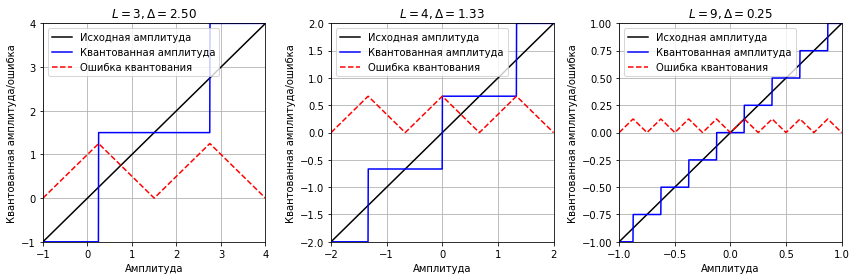

In [14]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
plot_graph_quant_function(ax, quant_min=-1, quant_max=4, quant_level=3)
ax = plt.subplot(1, 3, 2)
plot_graph_quant_function(ax, quant_min=-2, quant_max=2, quant_level=4)
ax = plt.subplot(1, 3, 3)
plot_graph_quant_function(ax, quant_min=-1, quant_max=1, quant_level=9)
plt.tight_layout()
plt.show()

# Задание

1. Реализовать функцию равномерного квантования.
2. Получить квантованные значения для линейной функции $y = x$.
3. Применить равномерное квантование к синусоиде с варьируемым числом
уровней квантования $L = 8, 16, 32, 64$. Вывести полученный результат.


In [ ]:
 def quantize_uniform(signal_ampl, quant_min=-1.0, quant_max=1.0, quant_level=4):
    x_normalize = (signal_ampl - quant_min) * (quant_level - 1) / (quant_max - quant_min)
    x_normalize[x_normalize > quant_level - 1]  = quant_level - 1
    x_normalize[x_normalize < 0]  = 0
    x_normalize_quant = np.round(x_normalize)
    return x_normalize_quant * (quant_max - quant_min) / (quant_level - 1) + quant_min